In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm.notebook import tqdm

As discussed in detail in our [initial paper](https://arxiv.org/abs/2106.00521), a primary concern was whether the observed anti-correlation between $q$ and $\chi_\mathrm{eff}$ was astrophysical, or somehow due to the fact that *measurements* of these quantities are degenerate in the same sense.

As a quick test, let's repeat our inference on the relationship between $q$ and $\chi_\mathrm{eff}$, but with the $\chi_\mathrm{eff}$ posteriors each reflected about their median. If the observed anti-correlation were due simply to degenerate measurements, we expect this reflection to reverse the population-level correlation that we infer.

For reference, here are our original posterior samples:

Exception ignored in: <function tqdm.__del__ at 0x7fe485e6ea60>
Traceback (most recent call last):
  File "/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/tqdm/std.py", line 1084, in __del__
    self.close()
  File "/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/tqdm/notebook.py", line 244, in close
    if self.total and self.n < self.total:
AttributeError: 'tqdm_notebook' object has no attribute 'total'


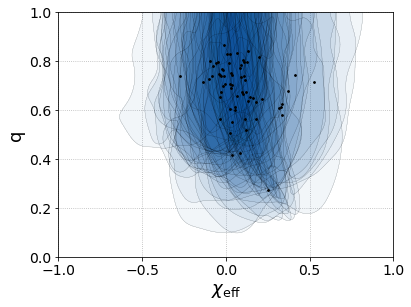

In [17]:
# Load samples and toss GW190814
posteriors = np.load("./../input/sampleDict_FAR_1_in_1_yr_08-26.pickle",allow_pickle=True)
gw190814 = posteriors.pop('S190814bv')

fig,ax = plt.subplots(figsize=(6,4.5))

# Grid over which KDE will be defined
chi_grid = np.linspace(-1,1,300)
q_grid = np.linspace(0,1,299)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]
X,Q = np.meshgrid((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2)

# Loop across events
for i,key in tqdm(enumerate(list(posteriors.keys())),length=len(posteriors.keys())):
    
    # Read out samples
    chis = posteriors[key]['Xeff']
    m1s = posteriors[key]['m1']
    m2s = posteriors[key]['m2']
    qs = m2s/m1s
    
    # Downsample by a factor of a few
    inds = np.random.choice(np.arange(qs.size),size=int(qs.size/10),replace=False)
    chis = chis[inds]
    qs = qs[inds]
    
    # Build KDE and evaluate over grid
    # Note that we're enforcing reflection symmetry across q=1
    kde1 = gaussian_kde([chis,qs])
    kde2 = gaussian_kde([chis,2.-qs])
    heights = kde1([X.reshape(-1),Q.reshape(-1)]) + kde2([X.reshape(-1),Q.reshape(-1)])
    heights = heights.reshape(q_grid.size-1,chi_grid.size-1)
    
    # Normalize and compute CDF, integrating outwards from the most probable point
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    # Find contour enclosing 90% probability
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    
    ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.4)
    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights,levels=(h90,np.inf),colors='#08519c',alpha=0.05)
 
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

plt.show()

Note the degenerate "banana" curves curving downward and to the right.

For comparison, this is the reflected dataset we'll be using:

Exception ignored in: <function tqdm.__del__ at 0x7fe485e6ea60>
Traceback (most recent call last):
  File "/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/tqdm/std.py", line 1084, in __del__
    self.close()
  File "/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/tqdm/notebook.py", line 244, in close
    if self.total and self.n < self.total:
AttributeError: 'tqdm_notebook' object has no attribute 'total'


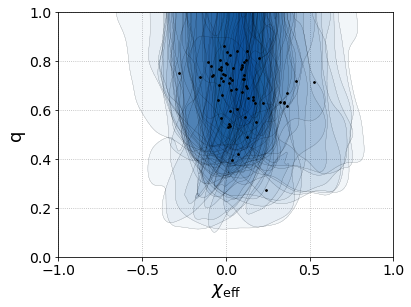

In [22]:
fig,ax = plt.subplots(figsize=(6,4.5))

# Grid over which KDE will be defined
chi_grid = np.linspace(-1,1,300)
q_grid = np.linspace(0,1,299)
dchi = chi_grid[1] - chi_grid[0]
dq = q_grid[1] - q_grid[0]
X,Q = np.meshgrid((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2)

# Loop across events
for i,key in tqdm(enumerate(list(posteriors.keys())),total=len(posteriors.keys())):
    
    # Read out samples
    chis = posteriors[key]['Xeff']
    m1s = posteriors[key]['m1']
    m2s = posteriors[key]['m2']
    qs = m2s/m1s
    
    # Reflect
    chis = np.median(chis) - (chis-np.median(chis))
    
    # Downsample by a factor of a few
    inds = np.random.choice(np.arange(qs.size),size=int(qs.size/10),replace=False)
    chis = chis[inds]
    qs = qs[inds]
    
    # Build KDE and evaluate over grid
    # Note that we're enforcing reflection symmetry across q=1
    kde1 = gaussian_kde([chis,qs])
    kde2 = gaussian_kde([chis,2.-qs])
    heights = kde1([X.reshape(-1),Q.reshape(-1)]) + kde2([X.reshape(-1),Q.reshape(-1)])
    heights = heights.reshape(q_grid.size-1,chi_grid.size-1)
    
    # Normalize and compute CDF, integrating outwards from the most probable point
    heights /= np.sum(heights)*dchi*dq
    heights_large_to_small = np.sort(heights.reshape(-1))[::-1]
    cdf = np.cumsum(heights_large_to_small)*dchi*dq
    
    # Find contour enclosing 90% probability
    h90 = np.interp(0.9,cdf,heights_large_to_small)
    
    ax.scatter([np.median(chis)],[np.median(qs)],color='black',zorder=100,s=3)
    
    ax.contour((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights,levels=(h90,np.inf),colors='black',linewidths=0.3,alpha=0.4)
    ax.contourf((chi_grid[:-1]+chi_grid[1:])/2,(q_grid[:-1]+q_grid[1:])/2,heights,levels=(h90,np.inf),colors='#08519c',alpha=0.05)
 
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=18)
ax.set_ylabel(r'q',fontsize=18)
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_axisbelow(True)
ax.tick_params(labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)

plt.show()

Our main finding is that the parameter $\alpha$ in the following equation is negative:

$$
\mu_\chi(q) = \mu_{\chi,0} + \alpha (q-1)
$$

Let's compare the posterior on $\alpha$ under our standard run, and under our "reversed" run:

In [29]:
normal_samps = np.load('./../results/results_08-30/processed_spin_vs_q_samples_FAR_1_in_1_r00.npy')
reversed_samps = np.load('./processed_spin_vs_q_samples_reversed_r00.npy')

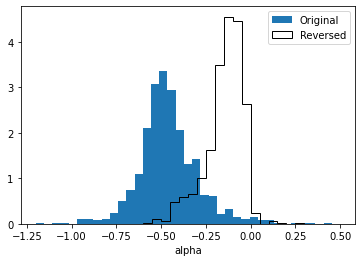

In [40]:
fig,ax = plt.subplots()
ax.hist(normal_samps[:,-2],density=True,bins=np.linspace(-1.2,0.5,38),label='Original')
ax.hist(reversed_samps[:,-2],density=True,bins=np.linspace(-1.2,0.5,35),label='Reversed',
        histtype='step',color='black')
plt.legend()
plt.xlabel('alpha')
plt.show()

In [41]:
print("Percentage of negative samples (Reversed):\t{0}".format(np.where(reversed_samps[:,-2]<0)[0].size/reversed_samps[:,-2].size))
print("Percentage of negative samples (Original):\t{0}".format(np.where(normal_samps[:,-2]<0)[0].size/normal_samps[:,-2].size))

Percentage of negative samples (Reversed):	0.9830729166666666
Percentage of negative samples (Original):	0.9810267857142857
